# En este notebook queremos repasar metodos de ML que se pueden usar para predecir cosas

### Librerias

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Datos

In [5]:
df = pd.read_csv('flight_prices_dataset.csv')

In [6]:
def data_quality_report(df):

    reporte_de_cualidad = {
        'Total records': len(df),
        'duplicated record': df.duplicated().sum(),
        'missing values': df.isnull().sum().to_dict(),
        'data types': df.dtypes.astype(str).to_dict(),
        

    }

    return reporte_de_cualidad

print(data_quality_report(df))

{'Total records': 1000, 'duplicated record': 0, 'missing values': {'distancia_km': 0, 'dias_anticipacion': 0, 'duracion_horas': 0, 'temporada_alta': 0, 'clase': 0, 'escalas': 0, 'fin_de_semana': 0, 'demanda': 0, 'precio_usd': 0}, 'data types': {'distancia_km': 'float64', 'dias_anticipacion': 'int64', 'duracion_horas': 'float64', 'temporada_alta': 'int64', 'clase': 'int64', 'escalas': 'int64', 'fin_de_semana': 'int64', 'demanda': 'float64', 'precio_usd': 'float64'}}


In [7]:
#Matriz de correlacion
import numpy as np
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()['precio_usd'].sort_values()

escalas             -0.044522
dias_anticipacion    0.023785
fin_de_semana        0.032336
demanda              0.121870
temporada_alta       0.123045
clase                0.151754
duracion_horas       0.926021
distancia_km         0.955259
precio_usd           1.000000
Name: precio_usd, dtype: float64

In [53]:
df.corr()

,distancia_km,dias_anticipacion,duracion_horas,temporada_alta,clase,escalas,fin_de_semana,demanda,precio_usd
distancia_km,1.000000,0.023783,0.970640,0.043623,-0.021383,0.034725,0.011975,0.056050,0.955259
dias_anticipacion,0.023783,1.000000,0.030872,0.036717,0.024278,-0.006023,-0.060244,-0.014723,0.023785
duracion_horas,0.970640,0.030872,1.000000,0.050997,-0.035482,0.028097,0.009015,0.053345,0.926021
temporada_alta,0.043623,0.036717,0.050997,1.000000,-0.015034,-0.021197,-0.001111,-0.014035,0.123045
clase,-0.021383,0.024278,-0.035482,-0.015034,1.000000,0.012789,-0.017265,0.028009,0.151754
escalas,0.034725,-0.006023,0.028097,-0.021197,0.012789,1.000000,-0.036333,-0.053004,-0.044522
fin_de_semana,0.011975,-0.060244,0.009015,-0.001111,-0.017265,-0.036333,1.000000,-0.047979,0.032336
demanda,0.056050,-0.014723,0.053345,-0.014035,0.028009,-0.053004,-0.047979,1.000000,0.121870
precio_usd,0.955259,0.023785,0.926021,0.123045,0.151754,-0.044522,0.032336,0.121870,1.000000


In [8]:
df.head()

,distancia_km,dias_anticipacion,duracion_horas,temporada_alta,clase,escalas,fin_de_semana,demanda,precio_usd
0,1997.79,47,2.57,1,0,0,0,0.303,859.50
1,4763.43,12,5.41,0,0,2,1,0.459,2713.74
2,3713.57,62,4.30,0,1,1,0,0.584,2027.71
3,3073.56,80,4.50,0,0,0,0,0.896,1471.52
4,948.89,83,1.11,0,0,0,1,0.859,459.12


In [9]:
df.describe()

,distancia_km,dias_anticipacion,duracion_horas,temporada_alta,clase,escalas,fin_de_semana,demanda,precio_usd
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2553.231600,89.162000,3.460150,0.319000,0.469000,0.646000,0.286000,0.656803,1381.693530
std,1402.259444,53.044071,1.959084,0.466322,0.658386,0.716378,0.452115,0.202982,875.200043
min,222.230000,1.000000,0.260000,0.000000,0.000000,0.000000,0.000000,0.302000,50.000000
25%,1332.672500,42.000000,1.740000,0.000000,0.000000,0.000000,0.000000,0.485750,629.277500
50%,2584.675000,89.000000,3.370000,0.000000,0.000000,1.000000,0.000000,0.661500,1182.655000
75%,3772.732500,136.000000,5.030000,1.000000,1.000000,1.000000,1.000000,0.835250,2063.840000
max,4998.640000,179.000000,8.210000,1.000000,2.000000,2.000000,1.000000,1.000000,3666.660000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   distancia_km       1000 non-null   float64
 1   dias_anticipacion  1000 non-null   int64  
 2   duracion_horas     1000 non-null   float64
 3   temporada_alta     1000 non-null   int64  
 4   clase              1000 non-null   int64  
 5   escalas            1000 non-null   int64  
 6   fin_de_semana      1000 non-null   int64  
 7   demanda            1000 non-null   float64
 8   precio_usd         1000 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 70.4 KB


## Metodos ML

### Linear regression

 <b>Linear Function</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Define X and Y

In [13]:
X = df[['distancia_km']]
Y = df['precio_usd']

Entrenar

In [14]:
lm.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediccion

In [15]:
Yhat=lm.predict(X)
Yhat[0:5]

array([1050.53296677, 2699.43881048, 2073.50040596, 1691.9192063 ,
        425.16692511])

<h4>What is the value of the intercept (a)?</h4>


In [16]:
lm.intercept_

-140.57202357114147

<h4>What is the value of the slope (b)?</h4>


In [17]:
lm.coef_

array([0.59621131])

Solucion regresion lineal
precio_USD = -140.572 - 0.5962 (distancia_km)

### Multiple Linear Regression


$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$



In [18]:
Z = df[['distancia_km', 'duracion_horas', 'escalas', 'temporada_alta']]

In [19]:
lm.fit(Z, df['precio_usd'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
lm.intercept_

-127.10771261225113

In [21]:
lm.coef_

array([  0.61989613, -17.85712877, -93.08079805, 150.41187854])

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

## Model evaluation

### regression plot

(0.0, 3852.069731222121)

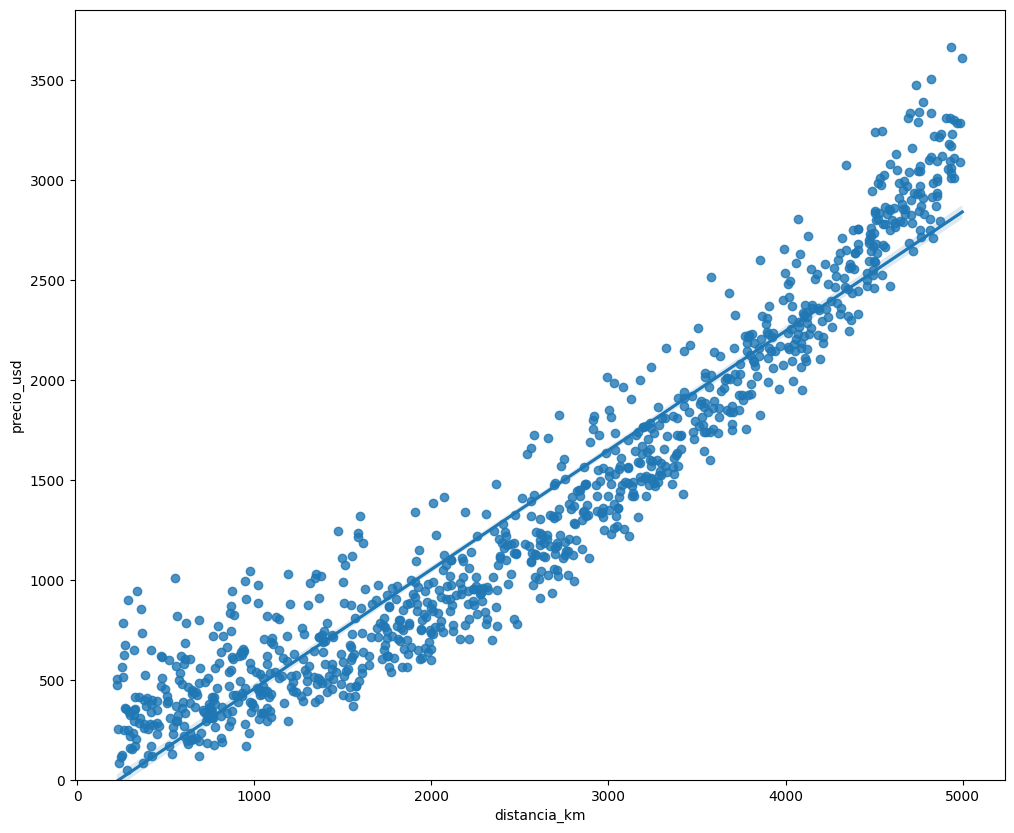

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="distancia_km", y="precio_usd", data=df)
plt.ylim(0,)

### residual plot

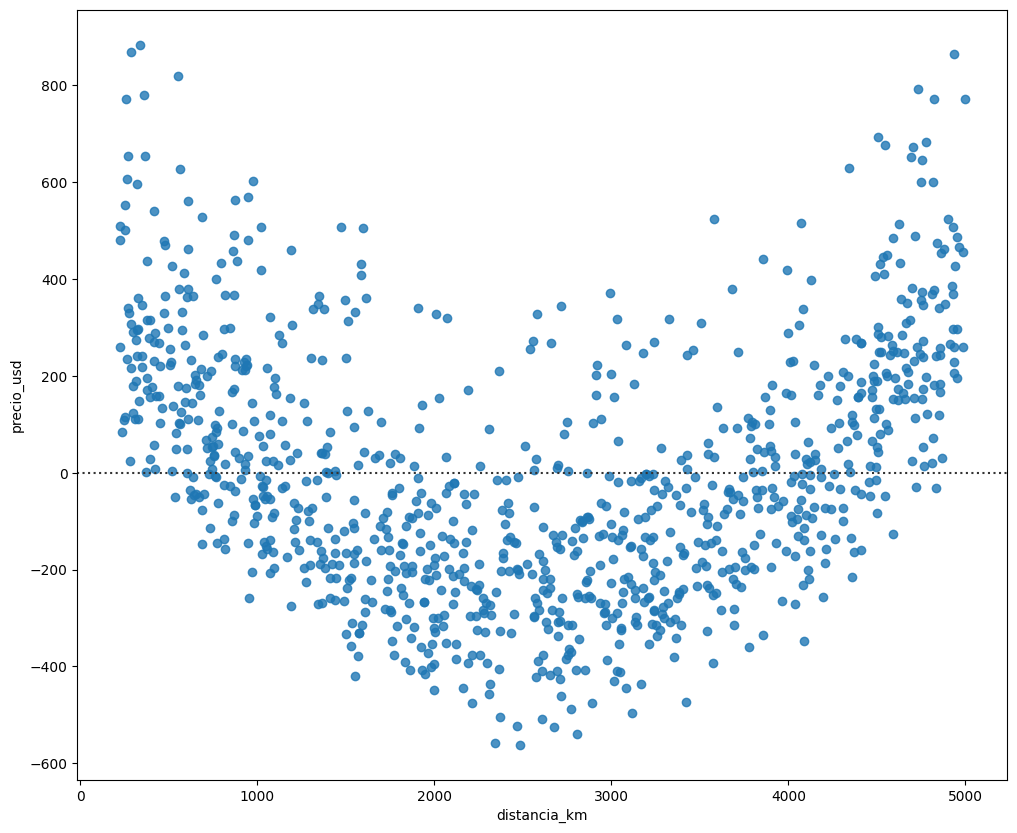

In [23]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['distancia_km'], y=df['precio_usd'])
plt.show()

### multiple regression evaluation

C:\Users\jeron\AppData\Local\Temp\ipykernel_39704\2163954714.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['precio_usd'], hist=False, color="r", label="Actual Value")
C:\Users\jeron\AppData\Local\Temp\ipykernel_39704\2163954714.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

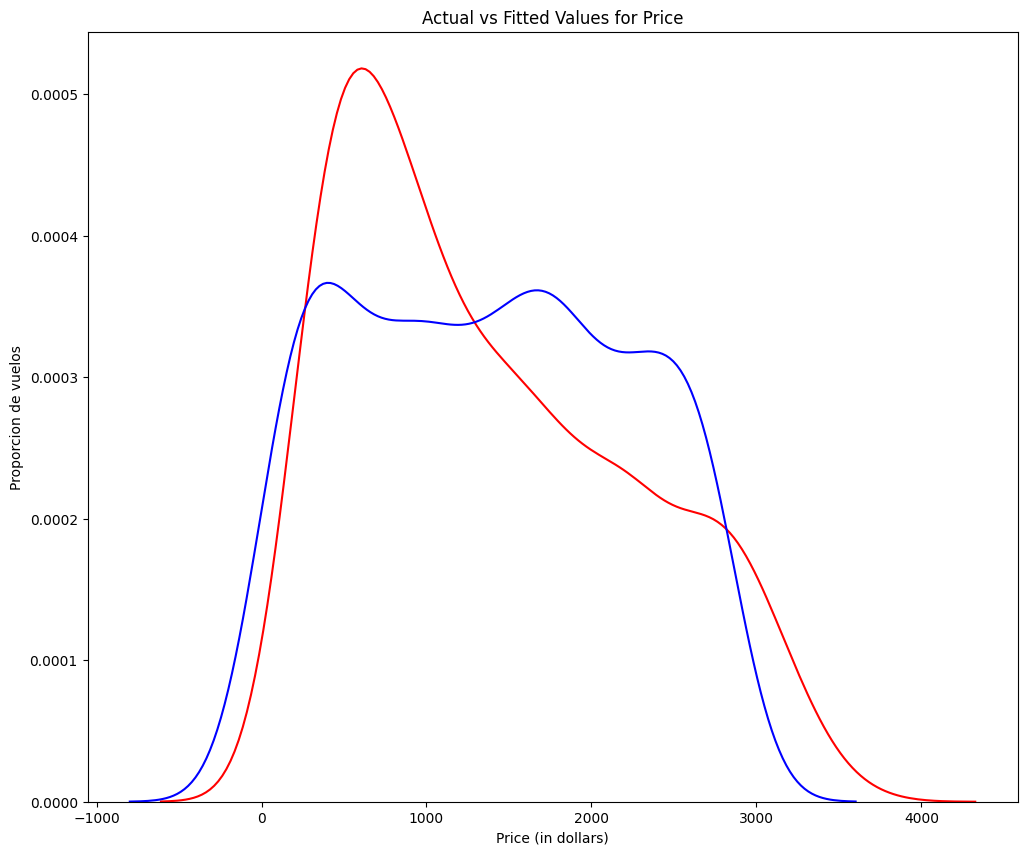

In [24]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['precio_usd'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proporcion de vuelos')

plt.show()
plt.close()

## Polynomial regression pipelines

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [27]:
pipe=Pipeline(Input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


### Evaluation

In [28]:
lm.fit(X, Y)
# R^2 error
lm.score(X, Y)

0.9125202384892973

In [29]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [1050.53296677 2699.43881048 2073.50040596 1691.9192063 ]


In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mse = mean_squared_error(df['precio_usd'], Yhat)
mse

66940.31301681633

In [32]:
mse**0.5
# que tan lejos estoy de los valores reales

258.72826095503433

In [33]:
lm.fit(Z, df['precio_usd'])
#R^2
lm.score(Z, df['precio_usd'])

0.9250088019412734

In [34]:
Y_predict_multifit = lm.predict(Z)

In [35]:
mse2 = mean_squared_error(df['precio_usd'], Y_predict_multifit)
mse2

57383.95012591636

In [36]:
mse2**0.5

239.54947323239173

## Evaluacion de modelo y refinamiento

### Training and testing

In [37]:
#Target data en otro lado
y_data = df['precio_usd']

In [38]:
#Es importante quitar lo que queremos predecir para asi crear un modelo de verdad
x_data=df.drop('precio_usd',axis=1)

Train test split

In [39]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 100
number of training samples: 900


In [40]:

lre=LinearRegression()

lre.fit(x_train[['distancia_km']], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [41]:
# R^2 Score

lre.score(x_test[['distancia_km']], y_test)

0.9256474439616652

In [42]:
lre.score(x_train[['distancia_km']], y_train)

0.9110969381285304

### Cross validation

Lo que hace es evaluar los resultados de un análisis estadístico y garantizar que son independientes de la partición entre datos de entrenamiento y prueba

In [43]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['distancia_km']], y_data, cv=10) # CV es el numero de particiones o folds

Rcross

array([0.91380537, 0.92446698, 0.91282906, 0.91115132, 0.91539946,
       0.89618578, 0.91363307, 0.92122728, 0.89759667, 0.9001229 ])

In [44]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.9106417898383855 and the standard deviation is 0.009163088679439498


In [45]:
from sklearn.model_selection import cross_val_predict

yhat = cross_val_predict(lre,x_data[['distancia_km']], y_data,cv=4)
yhat[0:5]

array([1050.4241274 , 2701.45162222, 2074.70782125, 1692.63564014,
        424.25342575])

### Overfitting, Underfitting and Model Selection

In [46]:
lr = LinearRegression()
lr.fit(x_train[['distancia_km', 'dias_anticipacion', 'duracion_horas', 'temporada_alta']], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
yhat_train = lr.predict(x_train[['distancia_km', 'dias_anticipacion', 'duracion_horas', 'temporada_alta']])
yhat_train[0:5]

array([ 217.17327417,  539.35982588,  695.28846264, 1850.29841443,
       1098.35818781])

In [48]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('')
    plt.show()
    plt.close()

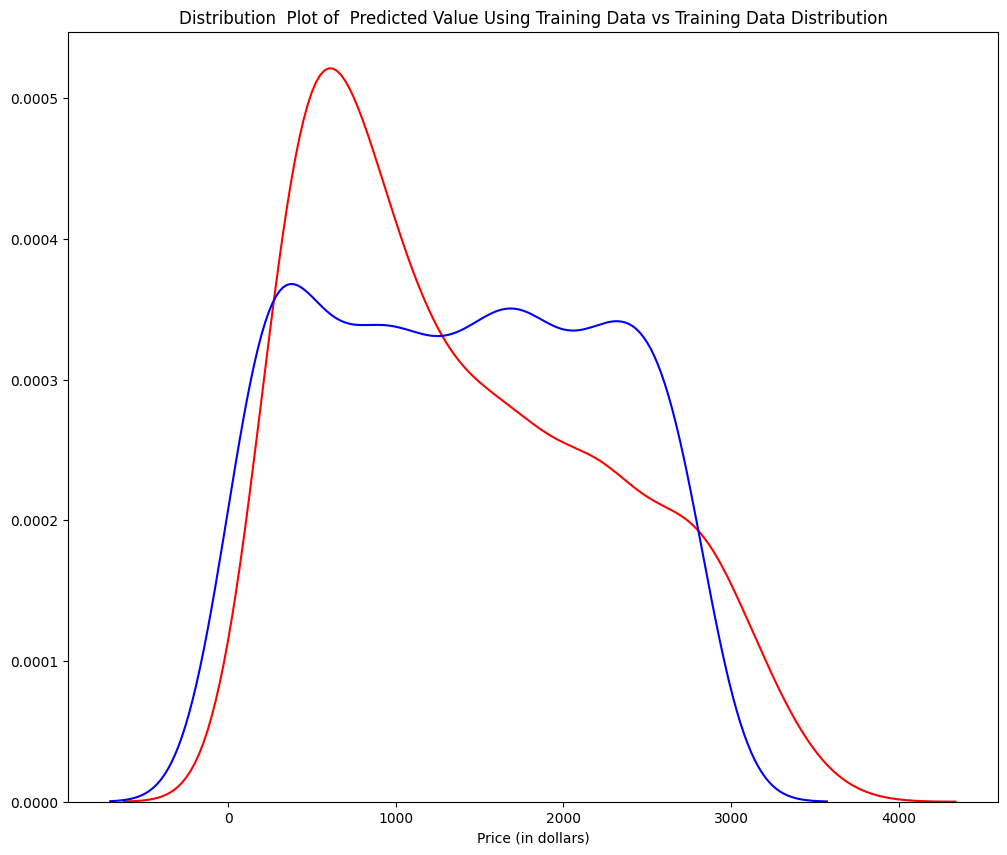

In [49]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Ridge Regression

In [50]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['distancia_km', 'duracion_horas', 'dias_anticipacion', 'temporada_alta']])
x_test_pr=pr.fit_transform(x_test[['distancia_km', 'duracion_horas', 'dias_anticipacion', 'temporada_alta']])

In [51]:
from sklearn.linear_model import Ridge

RigeModel=Ridge(alpha=1)

RigeModel.fit(x_train_pr, y_train)

yhat = RigeModel.predict(x_test_pr)

print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [2348.34380321  356.27538403  936.06444441  495.64197462]
test set : [2358.76  269.35  952.2   506.77]


c:\Users\jeron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=1.97279e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### Grid Search

In [52]:
from sklearn.model_selection import GridSearchCV

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

RR=Ridge()


Grid1 = GridSearchCV(RR, parameters1,cv=4)

Grid1.fit(x_data[['distancia_km', 'duracion_horas', 'dias_anticipacion', 'temporada_alta']], y_data)

BestRR=Grid1.best_estimator_


BestRR.score(x_test[['distancia_km', 'duracion_horas', 'dias_anticipacion', 'temporada_alta']], y_test)

0.9234844477529651